In [1]:
!jt -t chesterish

In [2]:
#load all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/anjalikarimpil/opt/miniconda3/envs/ds_handbook/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load the training and testing data
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")


In [4]:
# check the train data
print('Train dataframe shape: ',train_df.shape)
train_df.head()

Train dataframe shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check the test data
print('Test dataframe shape: ',test_df.shape)
test_df.head()

Test dataframe shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [7]:
# show missing data along with their percentage
def missing_data(df):
    nullvalues = df.isnull()
    total_missing = nullvalues.sum().sort_values(ascending=False)
    total_missing_percentage = nullvalues.sum()/nullvalues.count()*100
    total_missing_percentage = (round(total_missing_percentage,1)).sort_values(ascending=False)
    missing_data = pd.concat([total_missing,total_missing_percentage],axis=1,keys=['Total','%'])
    return missing_data

In [8]:
print('------Missing train data---')
missing_data(train_df)

------Missing train data---


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [9]:
print('------Missing test data---------')
missing_data(test_df)

------Missing test data---------


,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


0    549
1    342
Name: Survived, dtype: int64

So, total 61.62% passenger didnt survived.


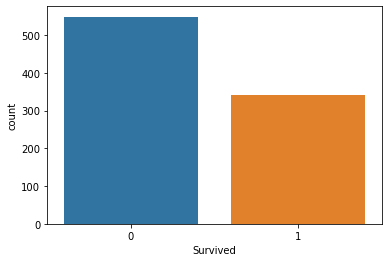

In [10]:
# check how many passengers (not)survived from the given dataseta along with their percentage
print(train_df['Survived'].value_counts())
survived = "{:.2f}".format(train_df['Survived'].value_counts(normalize=True)[0]*100)

sns.countplot(train_df['Survived'])
print('\nSo, total '+survived +'% passenger didnt survived.')

In [11]:
# this function is used to compare (not)survived based on a selective feature
def visualize_data(feature):
    plt.subplots(figsize = (10,10))
    ax=sns.countplot(x=feature,hue='Survived',data=train_df)
    plt.title("Survived vs Non-Survived by "+feature, fontsize = 25)
    leg=ax.get_legend()
    leg.set_title('Survival')
    legs=leg.texts
    legs[0].set_text('No')
    legs[1].set_text("yes")  
    
#this function is used to print number of Survived passenger by a selective feature
def print_survived_data_by_feature(data,feature):    
    print('\n\nNumber of Survived passenger by '+feature+' :')
    print(data[data['Survived']==1][feature].groupby(train_df[feature]).count())
    print('\n\nNumber of Dead passenger by '+feature+' :')
    print(train_df[data['Survived']==0][feature].groupby(data[feature]).count())    
    



Number of Survived passenger by Pclass :
Pclass
1    136
2     87
3    119
Name: Pclass, dtype: int64


Number of Dead passenger by Pclass :
Pclass
1     80
2     97
3    372
Name: Pclass, dtype: int64


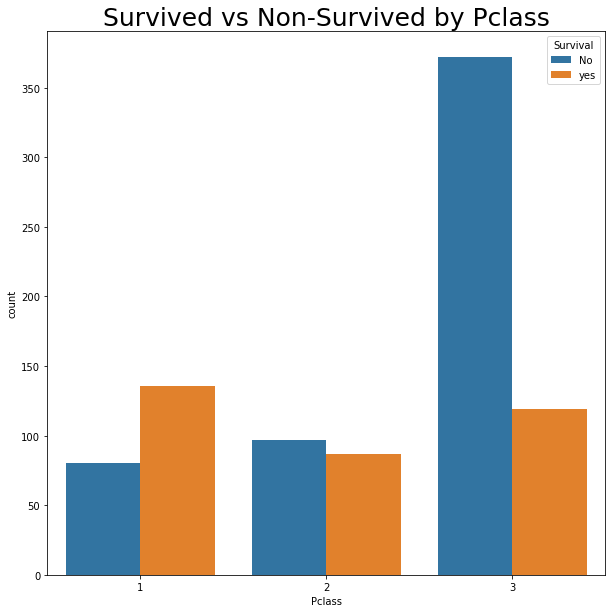

In [12]:
# Now check how many passengers (not)survived for each passenger's class
visualize_data('Pclass') 
print_survived_data_by_feature(train_df,'Pclass')

We can see that 3rd class passenger died mostly. On the other hand,survival rate of 1st class passenger was higher than others.

According to BBC news:

>Third class passengers were all in search of a new life in America. Each class of passengers had access to their own decks and allocated lifeboats - although crucially no lifeboats were stored in the third class sections of the ship.
Third class passengers had to find their way through a maze of corridors and staircases to reach the boat deck. First and second class passengers were most likely to reach the lifeboats as the boat deck was a first and second class promenade.
When the lifeboats were finally lowered officers gave the order that "women and children" should go first
<



Number of Survived passenger by Sex :
Sex
female    233
male      109
Name: Sex, dtype: int64


Number of Dead passenger by Sex :
Sex
female     81
male      468
Name: Sex, dtype: int64


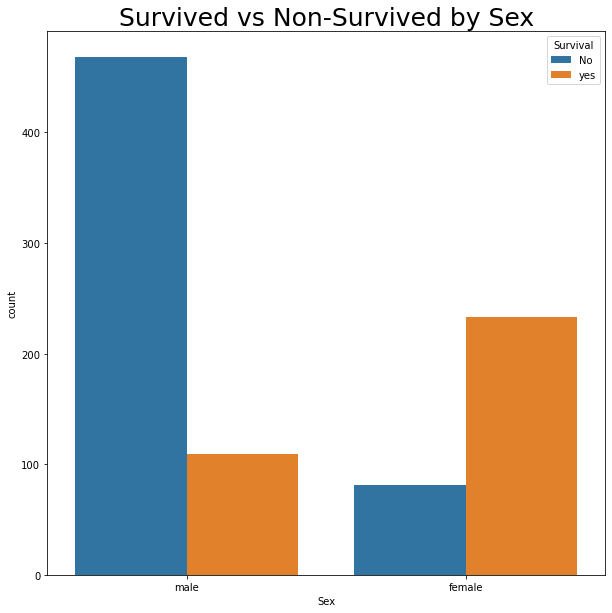

In [13]:
# Now check how many passengers (not)survived based on passenger's gender
visualize_data('Sex')
print_survived_data_by_feature(train_df,'Sex')

Here, we can see that man dided more compared to women as we know the fact that 'officers of the titanic gave the order that women and children should go first with the lifeboat'



Number of Survived passenger by SibSp :
SibSp
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


Number of Dead passenger by SibSp :
SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: SibSp, dtype: int64


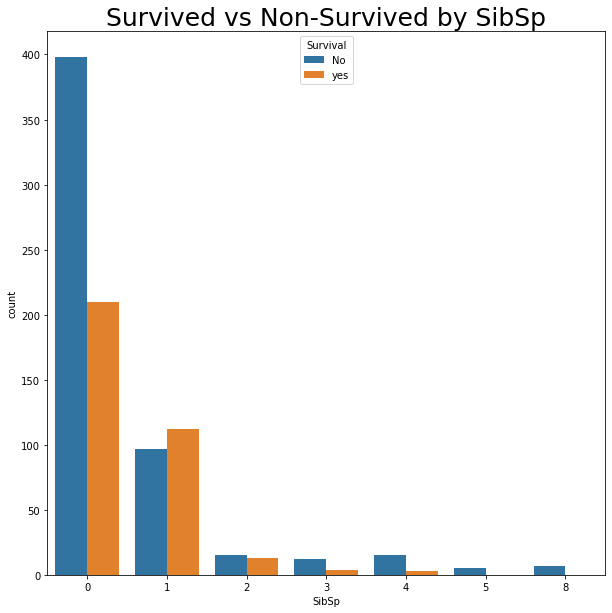

In [14]:
# Would married people fare better? 
# Now check how many passengers (not)survived based on no of siblings/spouses the passenger had
visualize_data('SibSp')
print_survived_data_by_feature(train_df,'SibSp')

This looks strange. It appears that passengers who were single died mostly, on the otherhand who had 1 sibling or spouse survived slightly higher compared to others. 
Perhaps all women on board who had 1 spouse comes under this? 
Clearly there are other facts which we need to explore. From this, we see from the data that most of the passengers were single. From the history, we know that most of the people were going to America searching for better life.

Were you more likely to survive if you travelled with your family? 



Number of Survived passenger by Parch :
Parch
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


Number of Dead passenger by Parch :
Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: Parch, dtype: int64


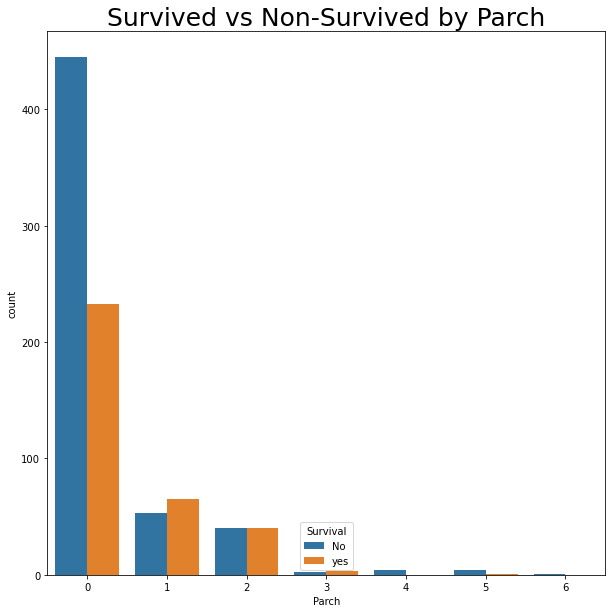

In [15]:
# Now, check how many passengers (not)survived based on number of parants/children the passenger had
visualize_data('Parch')
print_survived_data_by_feature(train_df,'Parch')

Similar observations here. Most of the people were single. But we can't draw a conclusion by seeing this graph. This graph shows that single passenger died but passenger who had 1 parent or child survived most compared to others.



Number of Survived passenger by Embarked :
Embarked
C     93
Q     30
S    217
Name: Embarked, dtype: int64


Number of Dead passenger by Embarked :
Embarked
C     75
Q     47
S    427
Name: Embarked, dtype: int64


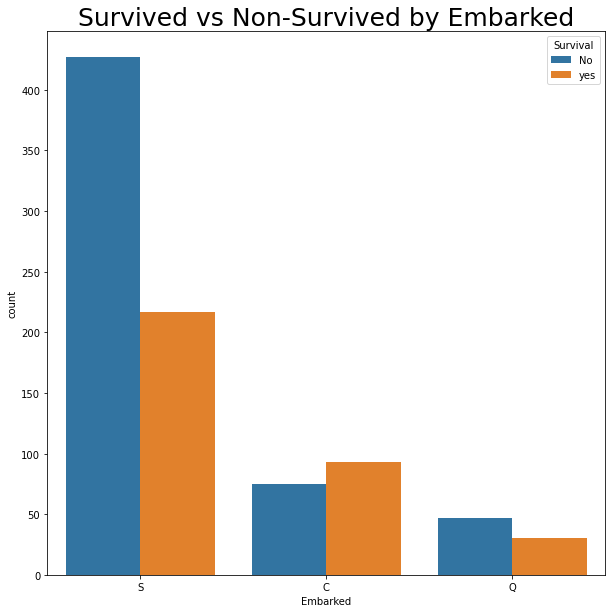

In [16]:
# Does where you embarked from indicate any chance of survival?
visualize_data('Embarked')
print_survived_data_by_feature(train_df,'Embarked')

Most of the passengers boarded from Southampton(S).
Interestingly, you are more likely to survive if you embarked Cherbourg(C). Probably wealthy people boarded from there? 
A good few of the crew and the workers boarded from Southampton and Queenstown, probably in lower classes - thus the lower rates of survival.

#### Feature engineering
If we see the Name column, first it might seem unnecessary for our analysis. But if we pay a closer look then we can get a necessary information from the Name colum. It gives us the information regarding the title of the passenger and this information might be useful for our analysis. So, we extract the title from the Name colum and make a new column named Title and remove the Name colum from the dataset.

In [17]:
#working with Name
import re
# This function is a helper function of title_feature function
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# This function is used to make a new column named 'Title' 
# which extracts the title from the 'Name' column as the title always ends with a dot(.) 
def title_feature(train_df,test_df):
    for data in [train_df,test_df]:
        data['Title'] = data['Name'].apply(extract_title)
        del data['Name']
    return train_df,test_df  

In [18]:
train_df, test_df = title_feature(train_df,test_df)

In [19]:
print('Unique Titles in train data')
print(train_df['Title'].value_counts())
print('\nUnique Titles in test data')
print(test_df['Title'].value_counts())

Unique Titles in train data
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Unique Titles in test data
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


This split checks out with the remaining analysis. We see the majority are "Mr" titles. Time to clean up these titles into sub-groups for better analysis.

In [20]:
# so categorize the titles
title_mapping = { "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
                 "Master": "Master","Dr": "Others", "Rev": "Others", "Col": "Others", "Major": "Others",
                 "Mlle": "Others","Countess": "Others",
                 "Ms": "Others", "Lady": "Others", "Jonkheer": "Others",
                 "Don": "Others", "Dona" : "Others", "Mme": "Others",
                 "Capt": "Others","Sir": "Others" }
def title_binning(train_df,test_df):
    for data in [train_df,test_df]:
        data['Title'] = data['Title'].map(title_mapping)
    return  train_df,test_df   

In [21]:
train_df, test_df = title_binning(train_df,test_df)
print('Now we have 5 unique Titles in train data:')
print(train_df['Title'].value_counts())

Now we have 5 unique Titles in train data:
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64




Number of Survived passenger by Title :
Title
Master     23
Miss      127
Mr         81
Mrs        99
Others     12
Name: Title, dtype: int64


Number of Dead passenger by Title :
Title
Master     17
Miss       55
Mr        436
Mrs        26
Others     15
Name: Title, dtype: int64


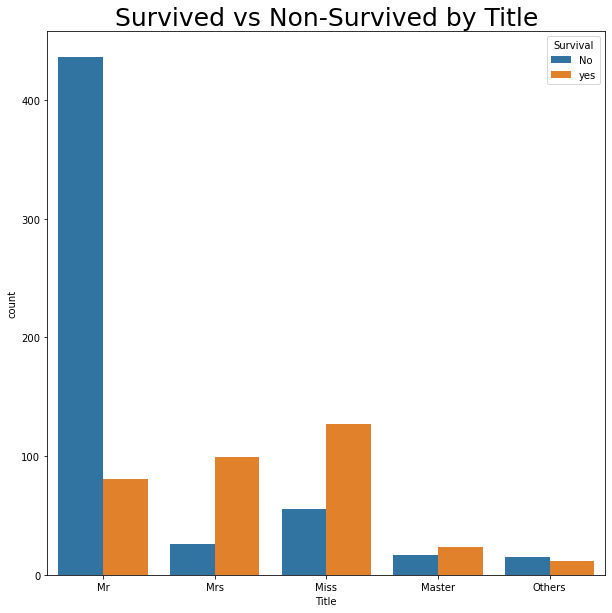

In [22]:
visualize_data('Title')
print_survived_data_by_feature(train_df,'Title')

Higher chances of survival if you're a Mrs or a Miss, or a Master

Here, we will create a new column named 'FamilySize' combining the colums 'SibSp' and 'Parach'. We also add one during the calculation as we include the passender himself into the familySize variable. We'll also group this variable for a meaningful analysis. Finally, we will delete the 'SibSp' and 'Parach' columns from the dataset.

In [23]:
#working with family size
#This function makes a new feature named 'FamilySize' where it has 3 types of family size namely 'Single','Small','Big'
def binned_family_size_feature(train_df,test_df):
    for data in [train_df,test_df]:
        fsize =  data['SibSp'] + data['Parch'] + 1
        data['FamilySize'] =np.where(fsize==1,'Single',np.where(fsize<=3,'Small','Big'))
        del data['SibSp']
        del data['Parch']
    return train_df,test_df 

In [24]:
train_df, test_df = binned_family_size_feature(train_df,test_df)



Number of Survived passenger by FamilySize :
FamilySize
Big        31
Single    163
Small     148
Name: FamilySize, dtype: int64


Number of Dead passenger by FamilySize :
FamilySize
Big        60
Single    374
Small     115
Name: FamilySize, dtype: int64


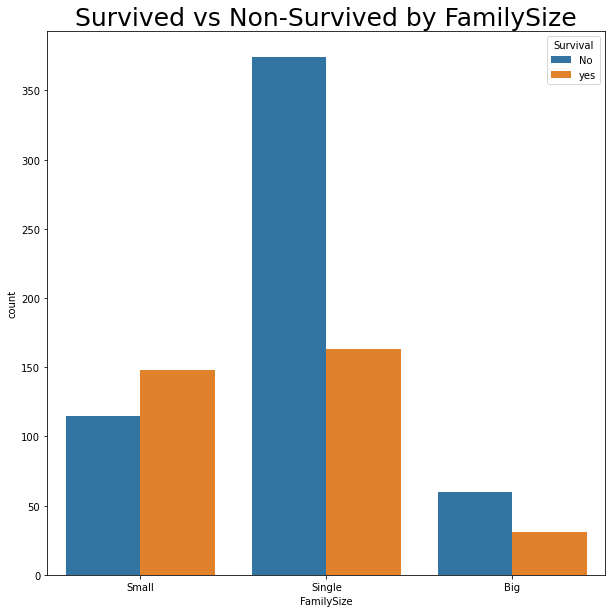

In [25]:

visualize_data('FamilySize')
print_survived_data_by_feature(train_df,'FamilySize')

As expected, singles were less likely to survive. If you had a small family of 3 or less, you were more likely to survive. However, big families had lesser rates of survival.

Okay, what else can we work with?

As the 'Age' column had 177(20%) missing value, we need to fill the missing value. Instead of the total average age, we can fill the missing Age column according to their title. As we already know their title, we can fill the missing value by grouping the title and taking the median of that title group.

In [26]:
#working with age
# This function is used to fill the missing values of age column with the median age value of respective 'Title'
def fill_missing_age(train_df,test_df):
    for data in [train_df,test_df]:
        train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
        test_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)   
    return train_df,test_df  

In [27]:
print('Before filling - Missing Age Count: '+str(train_df['Age'].isnull().sum()))
train_df, test_df = fill_missing_age(train_df,test_df)
print('After filling - Missing Age Count: '+str(train_df['Age'].isnull().sum()))

Before filling - Missing Age Count: 177
After filling - Missing Age Count: 0


Brilliant! We were able to impute for all missing values using the title feature. Now let's group these ages and take a look at the chances of survival for each group

In [28]:
#This function is used to make 5 bins of Age column namely 'Child','Young','Adult','Mid-age' and 'Senior'
def age_binning(train_df,test_df):    
    for data in [train_df,test_df]:
        data['Age'] =np.where(data['Age'] <=14,'1. Child',
                              np.where(((data['Age'] > 14) & (data['Age'] <= 22)),'1. Young',
                                       np.where(((data['Age'] > 22) & (data['Age'] <= 36)),'3. Adult',
                                                np.where(((data['Age'] > 36) & (data['Age'] <= 55)),'4. Mid-age','5. Senior'))))
    return train_df,test_df 

In [29]:
train_df, test_df = age_binning(train_df,test_df)



Number of Survived passenger by Age :
Age
1. Child       47
1. Young       75
3. Adult      148
4. Mid-age     60
5. Senior      12
Name: Age, dtype: int64


Number of Dead passenger by Age :
Age
1. Child       34
1. Young      115
3. Adult      276
4. Mid-age     96
5. Senior      28
Name: Age, dtype: int64


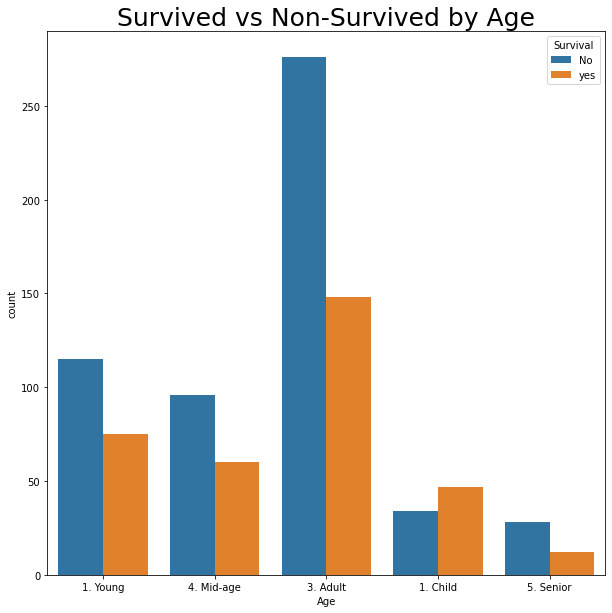

In [30]:
visualize_data('Age')
print_survived_data_by_feature(train_df,'Age')

Here, we can see that the adult passenger died mostly and the child passenger survived mostly as we already know the fact of preference during the lifeboat allocation.

In the test data fare has 1 missing value . First will indentify the passengerID of that data and then fill the NA value with the median of the Pclass value.

In [31]:
#pint(train_df.groupby("Pclass")["Fare"].median()[3]) 
print(train_df.groupby("Pclass")["Fare"].median())

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64


In [32]:
# find the PassengerId of that missing Fare value
print(test_df.loc[ test_df['Fare'].isnull()==True]['PassengerId'])
test_df.loc[ test_df['Fare'].isnull()==True]
#then fill the missing fare value of that passengerID
test_df.loc[test_df['PassengerId'] == 1044, 'Fare'] = test_df.groupby("Pclass")["Fare"].median()[3]
#check whether that passengerID with NA be found
print(test_df.loc[ test_df['Fare'].isnull()==True]['PassengerId'])

152    1044
Name: PassengerId, dtype: int64
Series([], Name: PassengerId, dtype: int64)


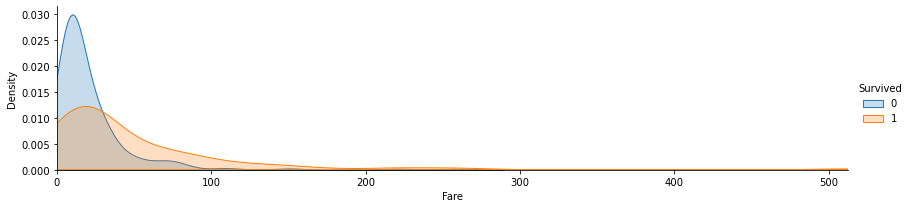

In [33]:
# check the survival data with respect of Fare column
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
#plt.xlim(0, 30)
plt.show()

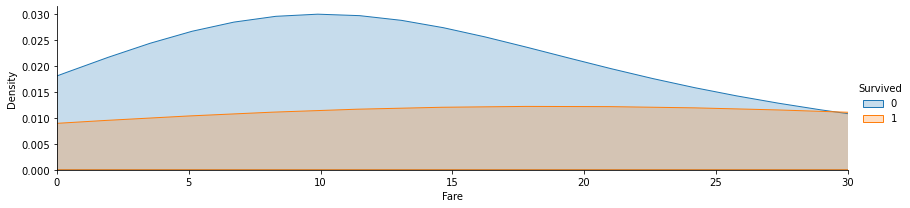

In [34]:
# we can take a closer look at the beginning of the graph (Zoom in view)
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
plt.show()

We can say that passenger who brought ticker within 10 dollar, the survival rate was low. This might be the reason that these were the 3rd class ticket and we have seen that passenger of 3rd class died mostly.

In [35]:
def fare_binning(train_df,test_df):    
    for data in [train_df,test_df]:
        data['Fare'] =np.where(data['Fare'] <=15,'Low',
                              np.where(((data['Fare'] > 15) & (data['Fare'] <= 35)),'Medium',
                                       np.where(((data['Fare'] > 35) & (data['Fare'] <= 100)),'High','Extreme')))
    return train_df,test_df 

In [36]:
train_df, test_df = fare_binning(train_df,test_df)



Number of Survived passenger by Fare :
Fare
Extreme     39
High        84
Low        114
Medium     105
Name: Fare, dtype: int64


Number of Dead passenger by Fare :
Fare
Extreme     14
High        61
Low        344
Medium     130
Name: Fare, dtype: int64


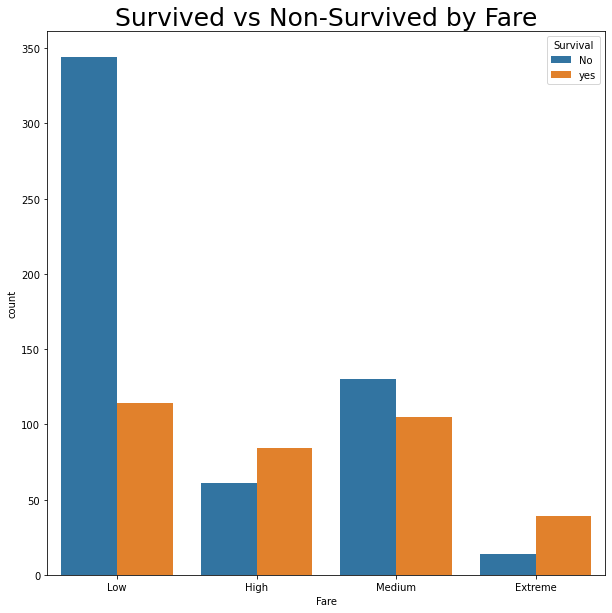

In [37]:
visualize_data('Fare')
print_survived_data_by_feature(train_df,'Fare')

So, we can see that passengers who bought tickets of lower cost died mostly but who brought the ticket with medium,high and extreme price had higher survival rates.

From the wikipedia, we know followings:

>All three of the Olympic-class ships had ten decks(cabin) 
(excluding the top of the officers' quarters),
 eight of which were for passenger use'. 
 
 
 From the dataset,we see that cabin has some extra number with it.But, If we extract the first letter from the cabin numbers, we get 8 cabins which matchs with the wiki information.

In [38]:
#working with Cabin
cbn = train_df['Cabin'].unique()
print('No of total Cabin(which includes different numbers)'+str(len(cbn)))
print(cbn)

No of total Cabin(which includes different numbers)148
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B

In [39]:
# this function extracts actual cabin letter(information)
def cabin_formation(train_df,test_df):
    for data in [train_df,test_df]:
        data['Cabin'] = data['Cabin'].str[:1]
    return train_df,test_df   

In [40]:
train_df, test_df = cabin_formation(train_df,test_df)



Number of Survived passenger by Cabin :
Cabin
A     7
B    35
C    35
D    25
E    24
F     8
G     2
Name: Cabin, dtype: int64


Number of Dead passenger by Cabin :
Cabin
A     8
B    12
C    24
D     8
E     8
F     5
G     2
T     1
Name: Cabin, dtype: int64


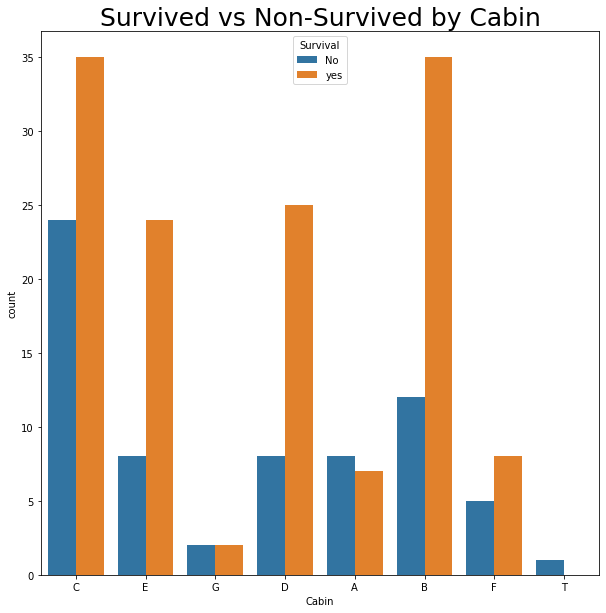

In [41]:
visualize_data('Cabin')
print_survived_data_by_feature(train_df,'Cabin')

Cabins G and A don't fare very well. Cabins B, C, D, E, F have good chances of survival. Cabins are correlated with fare I imagine.

<AxesSubplot:>

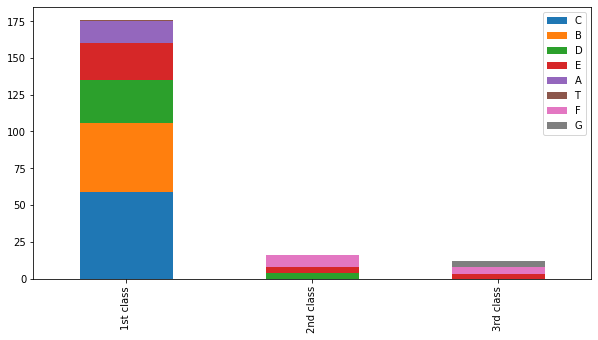

In [42]:
class1 = train_df[train_df['Pclass']==1]['Cabin'].value_counts()
class2 = train_df[train_df['Pclass']==2]['Cabin'].value_counts()
class3 = train_df[train_df['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([class1, class2, class3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

From here, we can delineate that first class has cabin A, B,C,D,E , 2nd class contains cabin D,E,F and 3rd class contains E,F,G. An interesting fact is that every class has a common cabin E which has higher survival rate. Previously we saw that cabin B,C,D,E had higher survival rate. The is reason is that all these cabin is from first class.

As around 77% of 'Cabin' data is missing , it would not be a good idea to fill the missing value or use it in our analyis. We gonna remove the 'Cabin' column from our dataset inorder to avoid a biased model.

In [43]:
# Remove 'Cabin' column from dataset
train_df.drop(['Cabin'],axis=1,inplace=True)
test_df.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

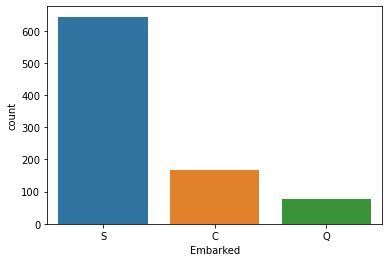

In [44]:
#working with Embarked
sns.countplot(train_df['Embarked'])

<AxesSubplot:>

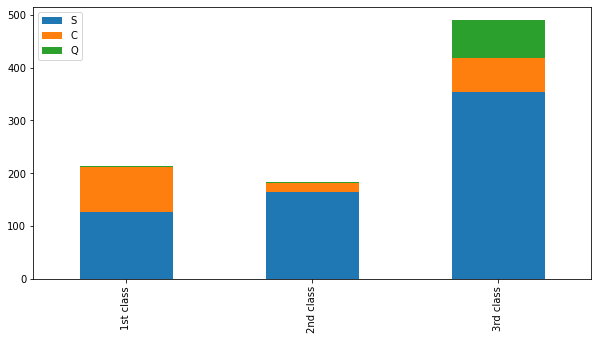

In [45]:

Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

We also can infer that most of the 3rd class passengers were from Southampton or Queenstown. At that time in history, these wore working class cities and probably people wanted to move to America searching for work. This explains why there were many 3rd class passengers from the Southampton/ Queenstown.

In [46]:
#as most of the passenger came from Southampton, we fill the missing value of 'Embarked' column with 'S'
def fill_missing_embarked(train_df,test_df):
    for data in [train_df,test_df]:
        data["Embarked"]=data["Embarked"].fillna('S')
    return train_df,test_df

In [47]:
train_df, test_df = fill_missing_embarked(train_df,test_df)

In [48]:
# so now, we dont have any missing value in our dataset
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64



Number of Survived passenger by Embarked :
Embarked
C     93
Q     30
S    219
Name: Embarked, dtype: int64


Number of Dead passenger by Embarked :
Embarked
C     75
Q     47
S    427
Name: Embarked, dtype: int64


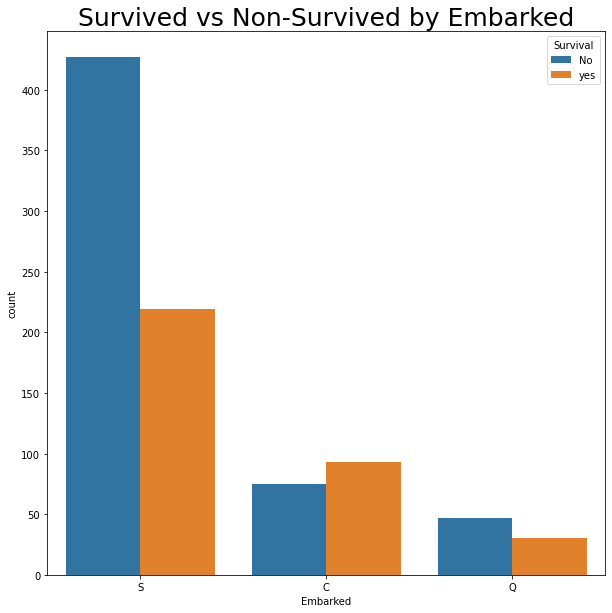

In [49]:
visualize_data('Embarked')
print_survived_data_by_feature(train_df,'Embarked')

In [50]:
train_df.head(50)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,male,1. Young,A/5 21171,Low,S,Mr,Small
1,2,1,1,female,4. Mid-age,PC 17599,High,C,Mrs,Small
2,3,1,3,female,3. Adult,STON/O2. 3101282,Low,S,Miss,Single
3,4,1,1,female,3. Adult,113803,High,S,Mrs,Small
4,5,0,3,male,3. Adult,373450,Low,S,Mr,Single
5,6,0,3,male,3. Adult,330877,Low,Q,Mr,Single
6,7,0,1,male,4. Mid-age,17463,High,S,Mr,Single
7,8,0,3,male,1. Child,349909,Medium,S,Master,Big
8,9,1,3,female,3. Adult,347742,Low,S,Mrs,Small
9,10,1,2,female,1. Child,237736,Medium,C,Mrs,Small


I didn't find any uses or any relation with Ticket column data, hence i have decided to drop the 'Ticket' column from the dataset.
Crew is not included in this passenger list. 

In [51]:
train_df.drop(['Ticket'],axis=1,inplace=True)
test_df.drop(['Ticket'],axis=1,inplace=True)

#### Encoding categorical values
As 'Sex' has two values(male or female) and they dont have any order. So, in this case we should use label encoding. Similarly, 'Embarked' and 'Title' column values have no order and we will use label encoding for these. On the otherhand, 'Pclass','Age','Fare','FamilySize' columns have order. So, we will use ordinal encoding for these columns.

In [52]:
# this function encodes feature with ordinal encodeing where order matters  
def ordinal_encoding(feature,mapping):
    for data in [train_df,test_df]:
        data[feature] = data[feature].map(mapping)

In [56]:
# # this function encodes feature with label encodeing by creating new columns with each values
def label_encoding(feature):
    train=pd.get_dummies(train_df,columns=[feature]) #,drop_first=True
    test=pd.get_dummies(test_df,columns=[feature]) #,drop_first=True
    return train,test

In [57]:
#encoding technique one with mix(label,ordinal) encoding
#def encoding_technique_one():
#map 'Sex' column 
train_df,test_df=label_encoding('Sex')
#map 'Age' column 
ordinal_encoding('Age',{'1. Child':0,'1. Young':1,'3. Adult':2,'4. Mid-age':3,'5. Senior':4})
#map 'Pclass' column 
 #already in order
#map 'Fare' column 
ordinal_encoding('Fare',{'Low':0,'Medium':1,'High':2,'Extreme':3})
#map 'Embarked' column 
train_df,test_df=label_encoding('Embarked')
#map 'Title' column 
train_df,test_df=label_encoding('Title')
#map 'FamilySize' column 
ordinal_encoding('FamilySize',{'Single':0,'Small':1,'Big':2})

In [58]:
train_df.drop(['PassengerId'],axis=1,inplace=True)
test_df.drop(['PassengerId'],axis=1,inplace=True)

In [60]:
train_df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,1,0,1,0,1,0,0,1,0,0,1,0,0
1,1,1,3,2,1,1,0,1,0,0,0,0,0,1,0
2,1,3,2,0,0,1,0,0,0,1,0,1,0,0,0
3,1,1,2,2,1,1,0,0,0,1,0,0,0,1,0
4,0,3,2,0,0,0,1,0,0,1,0,0,1,0,0


#### Modeling
We want to identify relationship between target variable (Survived or not) with other feature variables (Gender, Age, Class etc). Our problem is a classification and regression problem. We will apply some supervised learning model as we are training our model with a given dataset.

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest

In [61]:
#prepare the data
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
all_features = train_df.drop("Survived",axis=1)
target_feature = train_df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,target_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 14), (268, 14), (623,), (268,))

In [62]:
# this fn is used to apply a model which will be passed as parameter and return the accuracy using that model
def apply_model(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    prediction=model.predict(xtest)
    acc = round(accuracy_score(prediction,ytest)*100,2)
    return acc

In [63]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
logireg_acc=apply_model(LogisticRegression(),X_train,X_test,y_train,y_test)
print('The accuracy of the Logistic Regression is', logireg_acc)

The accuracy of the Logistic Regression is 82.46


In [64]:
#Apply  Random Forests
from sklearn.ensemble import RandomForestClassifier

randf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

randf_acc = apply_model(randf_model,X_train,X_test,y_train,y_test)
print('The accuracy of the Random Forest Classifier is', randf_acc)

The accuracy of the Random Forest Classifier is 79.85


In [65]:
# Apply SVM
from sklearn.svm import SVC, LinearSVC
svm_model = SVC()
svm_acc = apply_model(svm_model,X_train,X_test,y_train,y_test)
print('The accuracy of the Support Vector Machines Classifier is', svm_acc)

The accuracy of the Support Vector Machines Classifier is 82.46


In [66]:
#Apply knn
from sklearn.neighbors import KNeighborsClassifier

knn_acc = apply_model(KNeighborsClassifier(n_neighbors = 4),X_train,X_test,y_train,y_test)
print('The accuracy of the K Nearst Neighbors Classifier is', knn_acc)


The accuracy of the K Nearst Neighbors Classifier is 78.73


In [67]:
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree_model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dtree_acc = apply_model(dtree_model,X_train,X_test,y_train,y_test)
print('The accuracy of the DecisionTree Classifier is', dtree_acc)

The accuracy of the DecisionTree Classifier is 80.6


In [68]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Support Vector Machines', 'KNN', 
               'DecisionTree Classifier'],
    'Score': [logireg_acc, randf_acc, svm_acc, 
              knn_acc, dtree_acc]})
models = models.sort_values(by='Score', ascending=False)
models = models.set_index('Score')
models

,Model
Score,
82.46,Logistic Regression
82.46,Support Vector Machines
80.60,DecisionTree Classifier
79.85,Random Forest
78.73,KNN


Going to use the SVM model for deployment

In [69]:
import pickle
pickle.dump(svm_model,open('svm_model.pkl','wb'))

Total survived from test data 151 out of 418 (36.12%)


<AxesSubplot:ylabel='count'>

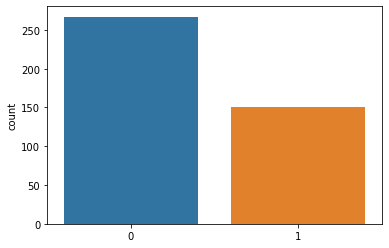

In [70]:
# Apply SVM
svm_prediction=svm_model.predict(test_df)
survived = np.count_nonzero(svm_prediction)
total = svm_prediction.size
print('Total survived from test data '+str(survived)+' out of '+str(total)+' ('+str(round((survived/total)*100,2))+'%)')
sns.countplot(svm_prediction)